In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import re
import os
import codecs
from sklearn import feature_extraction
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from hazm import *
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
Stopword = ['همچنان', 'مدت', 'چیز', 'سایر', 'جا', 'طی', 'کل', 'کنونی', 'بیرون','های', 'مثلا', 'کامل','ها', 'کاملا','گیرد','شود','است', 'آنکه', 
            'موارد', 'واقعی', 'امور', 'اکنون', 'بطور', 'بخشی', 'تحت', 'چگونه', 'عدم', 'نوعی', 'حاضر', 'وضع', 'مقابل', 'کنار', 'خویش', 'نگاه', 'درون',
            'زمانی', 'بنابراین', 'تو', 'خیلی', 'بزرگ', 'خودش', 'جز', 'اینجا', 'مختلف', 'توسط', 'نوع', 'همچنین', 'آنجا', 'قبل', 'جناح', 'اینها', 'طور', 'شاید',
            'ایشان', 'جهت', 'طریق', 'مانند', 'پیدا', 'ممکن', 'کسانی', 'جای', 'کسی', 'غیر', 'بی', 'قابل', 'درباره', 'جدید', 'وقتی', 'اخیر', 'چرا', 'بیش',
            'روی', 'طرف', 'جریان', 'زیر', 'آنچه', 'البته', 'فقط', 'چیزی', 'چون', 'برابر', 'هنوز', 'بخش', 'زمینه', 'بین', 'بدون', 'استفاد', 'همان', 'نشان',
            'بسیاری', 'بعد', 'عمل', 'روز', 'اعلام', 'چند', 'آنان', 'بلکه', 'امروز', 'تمام', 'بیشتر', 'آیا', 'برخی', 'علیه', 'دیگری', 'ویژه', 'گذشته', 'انجام',
            'حتی', 'داده', 'راه', 'سوی', 'ولی', 'زمان', 'حال', 'تنها', 'بسیار', 'یعنی', 'عنوان', 'همین', 'هبچ', 'پیش', 'وی', 'یکی', 'اینکه', 'وجود'
            , 'شما', 'پس', 'چنین', 'میان', 'مورد', 'چه', 'اگر', 'همه', 'نه', 'دیگر', 'آنها', 'باید', 'هر', 'او', 'ما', 'من', 'تا', 'نیز', 'اما', 
            'یک', 'خود', 'بر', 'یا', 'هم','ای', 'را','دارد', 'این',"می", 'با','دارد','،',',','.', 'آن', 'برای', 'و', 'در', 'به', 'که', 'از']

def clean(text):
    normalizer = Normalizer()
    text = normalizer.normalize(text).replace("#","").replace("RT","").replace("\u200c"," ")
    text = ''.join(ch for ch, _ in itertools.groupby(text))
    #text = re.sub(r'[^\w\s]', '', text)
    processed_text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    return processed_text.strip()



In [3]:
Texts = open(r"D:\Text9\data\Topic-Detection.txt",mode='r',encoding='utf-8').read()
Texts = clean(Texts).splitlines()
print(len(Texts))
ranks = []
for i in range(1, len(Texts)+1):
    ranks.append(i)

299


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.7,
                                    min_df=5, stop_words=Stopword,
                                   use_idf=True, tokenizer=word_tokenize, ngram_range=(1,1))

In [31]:
tfidf_matrix = tfidf_vectorizer.fit_transform(Texts)
terms = tfidf_vectorizer.get_feature_names()
print(tfidf_matrix.shape)
print(terms)

(299, 2079)
['!', '(', ')', '-', '/', '/ز', '/ی۲', '؛', '؟', 'آب', 'آباد', 'آبادی', 'آبان', 'آبی', 'آتی', 'آثار', 'آخر', 'آخرین', 'آذربایجان', 'آرام', 'آرامش', 'آرزوی', 'آرمان', 'آزاد', 'آزادی', 'آزمایش', 'آزمون', 'آسیا', 'آسیب', 'آشنا', 'آشنای', 'آغاز', 'آفرینی', 'آقای', 'آل', 'آلودگی', 'آماده', 'آمادگی', 'آمار', 'آمد', 'آمدن', 'آمدند', 'آمده', 'آمده_است', 'آمریکا', 'آمریکای', 'آموزش', 'آموزشی', 'آمیز', 'آور', 'آورد', 'آوردن', 'آوری', 'آگاهی', 'آیت', 'آید', 'آین', 'آینده', 'ائتلاف', 'ابتدا', 'ابتدای', 'ابراز', 'ابراهیمی', 'ابزار', 'ابعاد', 'ابلاغ', 'اتحادیه', 'اتخاذ', 'اتفاق', 'اتفاقات', 'اتمام', 'اثبات', 'اثر', 'اجازه', 'اجتماعی', 'اجرا', 'اجرای', 'احترام', 'احتمال', 'احتمالا', 'احتمالی', 'احداث', 'احراز', 'احزاب', 'احساس', 'احمد', 'احمدی', 'اخبار', 'اختصاص', 'اختصاصی', 'اختلاف', 'اختلافات', 'اختلال', 'اختیار', 'اخذ', 'اخراج', 'اخلاق', 'اخلاقی', 'اخیرا', 'اداره', 'اداری', 'ادامه', 'ادعا', 'ادعای', 'ارائه', 'اراده', 'ارایه', 'ارایٔه', 'ارتباط', 'ارتباطی', 'ارتش', 'ارتقا', 'ارتقاء', 'ا

In [33]:
silhouette_coefficients = []

kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,}

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(tfidf_matrix)
    score = silhouette_score(tfidf_matrix, kmeans.labels_)
    silhouette_coefficients.append(score)
silhouette_coefficients

[0.007912129363750567,
 0.00943371781651266,
 0.010017684868176797,
 0.01103296656439725,
 0.01076280175909706,
 0.010951496326160645,
 0.01219690826674427,
 0.01282802068491651,
 0.014714730884825748,
 0.01493398494678547,
 0.013996699255306232,
 0.01612420102943137,
 0.01586827336993616]

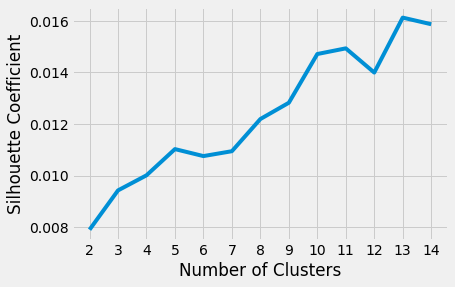

In [35]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [36]:
num_clusters = 13


kmeans = KMeans(n_clusters=num_clusters,init="k-means++")

kmeans.fit(tfidf_matrix)

clusters = kmeans.labels_.tolist()

clusters

[9,
 4,
 6,
 4,
 11,
 12,
 3,
 3,
 9,
 9,
 1,
 11,
 1,
 5,
 5,
 8,
 5,
 8,
 11,
 8,
 10,
 9,
 2,
 6,
 12,
 3,
 4,
 10,
 2,
 9,
 11,
 1,
 12,
 8,
 8,
 10,
 2,
 6,
 9,
 9,
 1,
 6,
 8,
 6,
 11,
 7,
 6,
 4,
 9,
 9,
 9,
 10,
 4,
 8,
 2,
 12,
 12,
 1,
 7,
 5,
 9,
 9,
 9,
 8,
 1,
 6,
 12,
 5,
 10,
 5,
 2,
 5,
 1,
 9,
 1,
 10,
 1,
 1,
 10,
 7,
 4,
 7,
 0,
 5,
 1,
 1,
 7,
 11,
 1,
 11,
 2,
 4,
 1,
 10,
 11,
 1,
 5,
 0,
 7,
 5,
 1,
 9,
 12,
 0,
 5,
 9,
 1,
 8,
 5,
 8,
 3,
 1,
 9,
 10,
 10,
 4,
 11,
 2,
 3,
 12,
 4,
 12,
 1,
 12,
 1,
 10,
 1,
 12,
 3,
 1,
 10,
 10,
 4,
 5,
 8,
 4,
 9,
 1,
 12,
 7,
 12,
 9,
 1,
 4,
 9,
 11,
 12,
 9,
 11,
 3,
 5,
 10,
 11,
 4,
 0,
 4,
 9,
 2,
 7,
 0,
 9,
 1,
 5,
 9,
 11,
 11,
 5,
 1,
 11,
 2,
 12,
 1,
 12,
 9,
 1,
 2,
 9,
 12,
 4,
 1,
 10,
 12,
 4,
 2,
 11,
 11,
 11,
 4,
 7,
 10,
 4,
 2,
 2,
 3,
 12,
 1,
 1,
 4,
 9,
 10,
 8,
 1,
 0,
 11,
 4,
 3,
 1,
 1,
 5,
 2,
 8,
 1,
 6,
 4,
 7,
 4,
 1,
 10,
 2,
 7,
 5,
 6,
 2,
 6,
 8,
 1,
 4,
 1,
 9,
 1,
 9,
 9,
 12,
 8,
 2,
 9,

In [39]:
Final_data = { 'rank': ranks, 'Texts': Texts,'cluster': clusters }

frame = pd.DataFrame(Final_data, index = [clusters] ,columns = ['rank', 'cluster'])

frame

,rank,cluster
9,1,9
4,2,4
6,3,6
4,4,4
11,5,11
12,6,12
3,7,3
3,8,3
9,9,9
9,10,9


In [40]:
#فراوانی اسناد در هر خوشه
frame['cluster'].value_counts()

1     48
9     40
4     28
12    26
10    25
5     24
11    23
8     21
2     18
7     14
6     12
3     12
0      8
Name: cluster, dtype: int64

In [43]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :40]:
        print(' %s' % terms[ind],end=',')
    print("\n")

Top terms per cluster:
Cluster 0:
 اقتصاد, اسلامی, تعاون, تعاونی, کتاب, پروژه, همایش, اخلاق, اجرای, اقتصادی, مطالعات, کشورهای, کشور, افزود, ملی, شامل, مسکن, آل, تهران, مربع, شرایط, برگزار, شهرسازی, حسینی, ستاد, فصل, کشورها, حوزه, ایران, متر, گفت, منظور, آخرین, خواهد_شد, مدیریت, علوم, موجود, فعالان, فنی, اجتماعی,

Cluster 1:
 بهداشت, بیماری, کشور, کرد, هزار, شهر, درمان, پزشکی, گفت, افزایش, کند, مصرف, وزیر, کاهش, ؛, بیمارستان, سال, داد, بازار, مواد, نفر, خصوص, آموزش, فروش, وزارت, قیمت, پزشک, مردم, غذا, سرطان, سازمان, خبرنگار, درصد, قلبی, صورت, خطر, تولید, غذای, گفتگو, حوزه,

Cluster 2:
 سوریه, روسیه, کرد, گفت, کشور, تروریسم, مل, عربستان, بحران, سیاست, بانک, آمریکا, سازمان, خارجی, المل, کشورهای, کند, رژیم, خارجه, دولت, صهیونیستی, مادر, دو, کنسرت, قطعه, الملی, قطر, بود, سیاسی, موسیقی, وزیر, حمایت, گروه, اسرائیل, دستگاه, سه, تحریم, شد, روابط, خلیج,

Cluster 3:
 ی, آنها, کند, آن, دهنده, اپل, شرکت, دستگاه, قرار, فضا, اطلاعات, جشنواره, فضای, سوری, شده, پرتاب, نام, قصد, صفحه, حساب, دولتی, بهر